In [1]:
#Source: https://github.com/tensorflow/docs/blob/master/site/en/tutorials/load_data/images.ipynb
#https://www.tensorflow.org/tutorials/images/classification?hl=en
import numpy as np
import os
import PIL
import PIL.Image
from keras import optimizers


import sys
from PIL import Image
sys.modules['Image'] = Image 

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array

import pathlib


In [2]:
tf.__version__

'2.3.1'

In [3]:
# Get current path
ROOT_PATH = os.path.abspath('')

In [4]:
train_dir = pathlib.Path(ROOT_PATH).joinpath("train/")
train_dir

WindowsPath('C:/keras/train')

In [5]:
image_count = len(list(train_dir.glob('*/*.jpg')))
print(image_count)

208


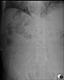

In [6]:
healthy = list(train_dir.glob('healthy/*'))
PIL.Image.open(str(healthy[0]))

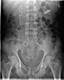

In [7]:
patients = list(train_dir.glob('patient/*'))
PIL.Image.open(str(patients[1]))

In [8]:
test_dir = pathlib.Path(ROOT_PATH).joinpath("test/")
test_dir

WindowsPath('C:/keras/test')

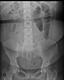

In [9]:
test_healthy=list(test_dir.glob('healthy/*'))
PIL.Image.open(str(test_healthy[0]))

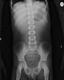

In [10]:
test_patients = list(test_dir.glob('patient/*'))
PIL.Image.open(str(test_patients[1]))

In [11]:
batch_size = 32
img_height = 80
img_width = 64

In [60]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                              # only read images from `test` directory
                              classes=['healthy','patient'],
                              # don't generate labels
                              class_mode='categorical',
                              # don't shuffle
                              shuffle=False,
                              # use same size as in training
                              target_size=(150, 150))

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 15 images belonging to 2 classes.
Found 208 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


In [61]:
# TEST DIR'DA healthy ve patient diye ayrılmalı

In [62]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 208 files belonging to 2 classes.
Using 167 files for training.


In [63]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 208 files belonging to 2 classes.
Using 41 files for validation.


In [64]:
class_names = train_ds.class_names
print(class_names)

['healthy', 'patient']


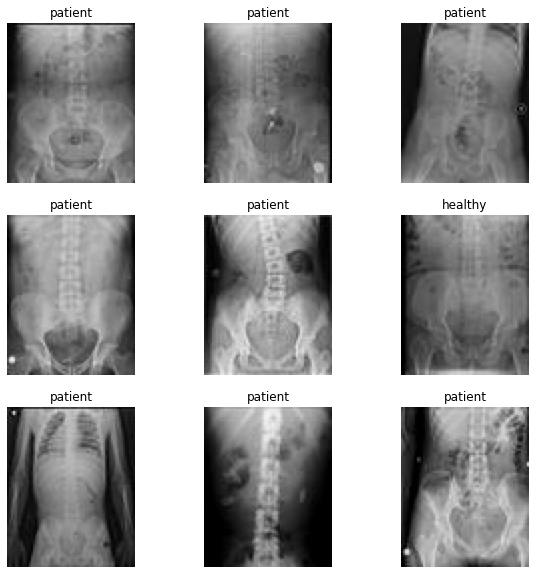

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [66]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 80, 64, 3)
(32,)


In [67]:
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [68]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.8352942


In [69]:
#train a model
num_classes = 2

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [70]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [71]:
epochs=1000
history=model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/1000
6/6 [==============================] - 1s 138ms/step - loss: 0.5900 - accuracy: 0.7006 - val_loss: 0.3128 - val_accuracy: 0.9268
Epoch 2/1000
6/6 [==============================] - 1s 99ms/step - loss: 0.5155 - accuracy: 0.8084 - val_loss: 0.3927 - val_accuracy: 0.9268
Epoch 3/1000
6/6 [==============================] - 1s 96ms/step - loss: 0.4886 - accuracy: 0.8084 - val_loss: 0.3039 - val_accuracy: 0.9268
Epoch 4/1000
6/6 [==============================] - 1s 94ms/step - loss: 0.4936 - accuracy: 0.8084 - val_loss: 0.3686 - val_accuracy: 0.9268
Epoch 5/1000
6/6 [==============================] - 1s 93ms/step - loss: 0.4900 - accuracy: 0.8084 - val_loss: 0.3776 - val_accuracy: 0.9268
Epoch 6/1000
6/6 [==============================] - 1s 95ms/step - loss: 0.4839 - accuracy: 0.8084 - val_loss: 0.3064 - val_accuracy: 0.9268
Epoch 7/1000
6/6 [==============================] - 1s 92ms/step - loss: 0.4911 - accuracy: 0.8084 - val_loss: 0.3438 - val_accuracy: 0.9268
Epoch 8/1000

Epoch 59/1000
6/6 [==============================] - 1s 95ms/step - loss: 0.1273 - accuracy: 0.9461 - val_loss: 0.7165 - val_accuracy: 0.8293
Epoch 60/1000
6/6 [==============================] - 1s 107ms/step - loss: 0.1341 - accuracy: 0.9581 - val_loss: 0.3760 - val_accuracy: 0.9024
Epoch 61/1000
6/6 [==============================] - 1s 121ms/step - loss: 0.1113 - accuracy: 0.9521 - val_loss: 0.3815 - val_accuracy: 0.9024
Epoch 62/1000
6/6 [==============================] - 1s 98ms/step - loss: 0.0716 - accuracy: 0.9701 - val_loss: 0.4277 - val_accuracy: 0.9024
Epoch 63/1000
6/6 [==============================] - 1s 96ms/step - loss: 0.0695 - accuracy: 0.9760 - val_loss: 0.4683 - val_accuracy: 0.9268
Epoch 64/1000
6/6 [==============================] - 1s 100ms/step - loss: 0.0719 - accuracy: 0.9641 - val_loss: 0.4492 - val_accuracy: 0.8780
Epoch 65/1000
6/6 [==============================] - 1s 97ms/step - loss: 0.0653 - accuracy: 0.9701 - val_loss: 0.4562 - val_accuracy: 0.8537
Epo

6/6 [==============================] - 1s 113ms/step - loss: 0.0334 - accuracy: 0.9880 - val_loss: 0.6769 - val_accuracy: 0.8537
Epoch 117/1000
6/6 [==============================] - 1s 103ms/step - loss: 0.0326 - accuracy: 0.9880 - val_loss: 0.6911 - val_accuracy: 0.8780
Epoch 118/1000
6/6 [==============================] - 1s 98ms/step - loss: 0.0320 - accuracy: 0.9880 - val_loss: 0.7230 - val_accuracy: 0.9024
Epoch 119/1000
6/6 [==============================] - 1s 104ms/step - loss: 0.0286 - accuracy: 0.9880 - val_loss: 0.6342 - val_accuracy: 0.8780
Epoch 120/1000
6/6 [==============================] - 1s 94ms/step - loss: 0.0316 - accuracy: 0.9880 - val_loss: 0.6181 - val_accuracy: 0.8537
Epoch 121/1000
6/6 [==============================] - 1s 98ms/step - loss: 0.0232 - accuracy: 0.9880 - val_loss: 0.7077 - val_accuracy: 0.9024
Epoch 122/1000
6/6 [==============================] - 1s 102ms/step - loss: 0.0342 - accuracy: 0.9880 - val_loss: 0.6580 - val_accuracy: 0.8780
Epoch 123/

6/6 [==============================] - 1s 90ms/step - loss: 0.0818 - accuracy: 0.9760 - val_loss: 0.6638 - val_accuracy: 0.8780
Epoch 174/1000
6/6 [==============================] - 1s 93ms/step - loss: 0.0446 - accuracy: 0.9760 - val_loss: 0.6250 - val_accuracy: 0.9024
Epoch 175/1000
6/6 [==============================] - 1s 89ms/step - loss: 0.0285 - accuracy: 0.9880 - val_loss: 0.6492 - val_accuracy: 0.9024
Epoch 176/1000
6/6 [==============================] - 1s 93ms/step - loss: 0.0335 - accuracy: 0.9940 - val_loss: 0.6008 - val_accuracy: 0.9024
Epoch 177/1000
6/6 [==============================] - 1s 93ms/step - loss: 0.0449 - accuracy: 0.9880 - val_loss: 0.6451 - val_accuracy: 0.9024
Epoch 178/1000
6/6 [==============================] - 1s 96ms/step - loss: 0.0389 - accuracy: 0.9880 - val_loss: 0.7070 - val_accuracy: 0.9024
Epoch 179/1000
6/6 [==============================] - 1s 91ms/step - loss: 0.0206 - accuracy: 0.9880 - val_loss: 0.6514 - val_accuracy: 0.9024
Epoch 180/1000

6/6 [==============================] - 1s 93ms/step - loss: 0.0419 - accuracy: 0.9880 - val_loss: 0.8134 - val_accuracy: 0.8537
Epoch 231/1000
6/6 [==============================] - 1s 89ms/step - loss: 0.0234 - accuracy: 0.9880 - val_loss: 0.7583 - val_accuracy: 0.8780
Epoch 232/1000
6/6 [==============================] - 1s 89ms/step - loss: 0.0187 - accuracy: 0.9880 - val_loss: 0.7567 - val_accuracy: 0.8780
Epoch 233/1000
6/6 [==============================] - 1s 91ms/step - loss: 0.0186 - accuracy: 0.9940 - val_loss: 0.7944 - val_accuracy: 0.8780
Epoch 234/1000
6/6 [==============================] - 1s 89ms/step - loss: 0.0205 - accuracy: 0.9880 - val_loss: 0.8105 - val_accuracy: 0.9024
Epoch 235/1000
6/6 [==============================] - 1s 90ms/step - loss: 0.0176 - accuracy: 0.9880 - val_loss: 0.8133 - val_accuracy: 0.8780
Epoch 236/1000
6/6 [==============================] - 1s 91ms/step - loss: 0.0152 - accuracy: 0.9940 - val_loss: 0.8395 - val_accuracy: 0.9024
Epoch 237/1000

6/6 [==============================] - 1s 92ms/step - loss: 0.0745 - accuracy: 0.9880 - val_loss: 0.8006 - val_accuracy: 0.9024
Epoch 288/1000
6/6 [==============================] - 1s 89ms/step - loss: 0.0395 - accuracy: 0.9880 - val_loss: 1.0202 - val_accuracy: 0.8537
Epoch 289/1000
6/6 [==============================] - 1s 92ms/step - loss: 0.0308 - accuracy: 0.9880 - val_loss: 1.1078 - val_accuracy: 0.8537
Epoch 290/1000
6/6 [==============================] - 1s 89ms/step - loss: 0.0348 - accuracy: 0.9880 - val_loss: 1.0762 - val_accuracy: 0.8537
Epoch 291/1000
6/6 [==============================] - 1s 92ms/step - loss: 0.0299 - accuracy: 0.9820 - val_loss: 0.9825 - val_accuracy: 0.8049
Epoch 292/1000
6/6 [==============================] - 1s 90ms/step - loss: 0.0329 - accuracy: 0.9880 - val_loss: 0.8347 - val_accuracy: 0.8537
Epoch 293/1000
6/6 [==============================] - 1s 90ms/step - loss: 0.0248 - accuracy: 0.9880 - val_loss: 0.8355 - val_accuracy: 0.8780
Epoch 294/1000

6/6 [==============================] - 1s 90ms/step - loss: 0.0143 - accuracy: 0.9940 - val_loss: 1.0007 - val_accuracy: 0.8780
Epoch 345/1000
6/6 [==============================] - 1s 89ms/step - loss: 0.0152 - accuracy: 0.9940 - val_loss: 1.0145 - val_accuracy: 0.8780
Epoch 346/1000
6/6 [==============================] - 1s 91ms/step - loss: 0.0214 - accuracy: 0.9880 - val_loss: 1.1374 - val_accuracy: 0.8049
Epoch 347/1000
6/6 [==============================] - 1s 90ms/step - loss: 0.0474 - accuracy: 0.9880 - val_loss: 0.8957 - val_accuracy: 0.8537
Epoch 348/1000
6/6 [==============================] - 1s 89ms/step - loss: 0.0607 - accuracy: 0.9940 - val_loss: 1.0267 - val_accuracy: 0.7561
Epoch 349/1000
6/6 [==============================] - 1s 90ms/step - loss: 0.0477 - accuracy: 0.9880 - val_loss: 0.8349 - val_accuracy: 0.8049
Epoch 350/1000
6/6 [==============================] - 1s 92ms/step - loss: 0.0355 - accuracy: 0.9880 - val_loss: 0.8623 - val_accuracy: 0.8049
Epoch 351/1000

6/6 [==============================] - 1s 91ms/step - loss: 0.0279 - accuracy: 0.9880 - val_loss: 0.8011 - val_accuracy: 0.9024
Epoch 402/1000
6/6 [==============================] - 1s 90ms/step - loss: 0.0178 - accuracy: 0.9940 - val_loss: 0.8166 - val_accuracy: 0.9024
Epoch 403/1000
6/6 [==============================] - 1s 90ms/step - loss: 0.0151 - accuracy: 0.9940 - val_loss: 0.8230 - val_accuracy: 0.9024
Epoch 404/1000
6/6 [==============================] - 1s 91ms/step - loss: 0.0162 - accuracy: 0.9940 - val_loss: 0.8332 - val_accuracy: 0.8780
Epoch 405/1000
6/6 [==============================] - 1s 91ms/step - loss: 0.0221 - accuracy: 0.9940 - val_loss: 0.9167 - val_accuracy: 0.9024
Epoch 406/1000
6/6 [==============================] - 1s 89ms/step - loss: 0.0240 - accuracy: 0.9940 - val_loss: 0.8927 - val_accuracy: 0.9024
Epoch 407/1000
6/6 [==============================] - 1s 90ms/step - loss: 0.0161 - accuracy: 0.9940 - val_loss: 0.8801 - val_accuracy: 0.8780
Epoch 408/1000

6/6 [==============================] - 1s 92ms/step - loss: 0.0282 - accuracy: 0.9940 - val_loss: 1.2375 - val_accuracy: 0.8780
Epoch 459/1000
6/6 [==============================] - 1s 90ms/step - loss: 0.0265 - accuracy: 0.9940 - val_loss: 1.3188 - val_accuracy: 0.8293
Epoch 460/1000
6/6 [==============================] - 1s 93ms/step - loss: 0.0196 - accuracy: 0.9940 - val_loss: 1.3651 - val_accuracy: 0.8049
Epoch 461/1000
6/6 [==============================] - 1s 91ms/step - loss: 0.0151 - accuracy: 0.9940 - val_loss: 1.3004 - val_accuracy: 0.8049
Epoch 462/1000
6/6 [==============================] - 1s 99ms/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 1.2921 - val_accuracy: 0.8293
Epoch 463/1000
6/6 [==============================] - 1s 95ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 1.2831 - val_accuracy: 0.8537
Epoch 464/1000
6/6 [==============================] - 1s 100ms/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 1.2869 - val_accuracy: 0.8780
Epoch 465/100

6/6 [==============================] - 1s 90ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 1.4223 - val_accuracy: 0.8780
Epoch 516/1000
6/6 [==============================] - 1s 90ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 1.4350 - val_accuracy: 0.8780
Epoch 517/1000
6/6 [==============================] - 1s 89ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 1.4411 - val_accuracy: 0.8780
Epoch 518/1000
6/6 [==============================] - 1s 90ms/step - loss: 0.0171 - accuracy: 0.9940 - val_loss: 1.4395 - val_accuracy: 0.8780
Epoch 519/1000
6/6 [==============================] - 1s 91ms/step - loss: 0.0131 - accuracy: 0.9940 - val_loss: 1.4433 - val_accuracy: 0.8780
Epoch 520/1000
6/6 [==============================] - 1s 89ms/step - loss: 0.0105 - accuracy: 0.9940 - val_loss: 1.4721 - val_accuracy: 0.8537
Epoch 521/1000
6/6 [==============================] - 1s 89ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 1.4771 - val_accuracy: 0.8780
Epoch 522/1000

6/6 [==============================] - 1s 90ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 1.6928 - val_accuracy: 0.8780
Epoch 573/1000
6/6 [==============================] - 1s 93ms/step - loss: 0.0176 - accuracy: 0.9940 - val_loss: 1.6164 - val_accuracy: 0.8780
Epoch 574/1000
6/6 [==============================] - 1s 88ms/step - loss: 0.0127 - accuracy: 0.9940 - val_loss: 1.5196 - val_accuracy: 0.8049
Epoch 575/1000
6/6 [==============================] - 1s 89ms/step - loss: 0.0202 - accuracy: 0.9880 - val_loss: 1.5260 - val_accuracy: 0.8780
Epoch 576/1000
6/6 [==============================] - 1s 91ms/step - loss: 0.0132 - accuracy: 0.9940 - val_loss: 1.5705 - val_accuracy: 0.8780
Epoch 577/1000
6/6 [==============================] - 1s 90ms/step - loss: 0.0083 - accuracy: 0.9940 - val_loss: 1.4794 - val_accuracy: 0.8780
Epoch 578/1000
6/6 [==============================] - 1s 89ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 1.5083 - val_accuracy: 0.8780
Epoch 579/1000

6/6 [==============================] - 1s 90ms/step - loss: 0.0194 - accuracy: 0.9940 - val_loss: 0.8048 - val_accuracy: 0.8537
Epoch 630/1000
6/6 [==============================] - 1s 91ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 0.8267 - val_accuracy: 0.8537
Epoch 631/1000
6/6 [==============================] - 1s 90ms/step - loss: 0.0131 - accuracy: 0.9940 - val_loss: 0.8377 - val_accuracy: 0.8537
Epoch 632/1000
6/6 [==============================] - 1s 89ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.8352 - val_accuracy: 0.8537
Epoch 633/1000
6/6 [==============================] - 1s 90ms/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.8375 - val_accuracy: 0.8537
Epoch 634/1000
6/6 [==============================] - 1s 91ms/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.8429 - val_accuracy: 0.8537
Epoch 635/1000
6/6 [==============================] - 1s 91ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.8486 - val_accuracy: 0.8537
Epoch 636/1000

6/6 [==============================] - 1s 90ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 1.0803 - val_accuracy: 0.8537
Epoch 687/1000
6/6 [==============================] - 1s 91ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 1.0840 - val_accuracy: 0.8780
Epoch 688/1000
6/6 [==============================] - 1s 90ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 1.0853 - val_accuracy: 0.8780
Epoch 689/1000
6/6 [==============================] - 1s 89ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 1.0787 - val_accuracy: 0.8780
Epoch 690/1000
6/6 [==============================] - 1s 91ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.0884 - val_accuracy: 0.8780
Epoch 691/1000
6/6 [==============================] - 1s 89ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.1177 - val_accuracy: 0.8780
Epoch 692/1000
6/6 [==============================] - 1s 89ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.1355 - val_accuracy: 0.8780
Epoch 693/1000

6/6 [==============================] - 1s 90ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.2208 - val_accuracy: 0.8537
Epoch 744/1000
6/6 [==============================] - 1s 92ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.2208 - val_accuracy: 0.8780
Epoch 745/1000
6/6 [==============================] - 1s 90ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.2069 - val_accuracy: 0.8780
Epoch 746/1000
6/6 [==============================] - 1s 90ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 1.2191 - val_accuracy: 0.8780
Epoch 747/1000
6/6 [==============================] - 1s 89ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.2350 - val_accuracy: 0.8780
Epoch 748/1000
6/6 [==============================] - 1s 89ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 1.2981 - val_accuracy: 0.8293
Epoch 749/1000
6/6 [==============================] - 1s 90ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 1.2624 - val_accuracy: 0.8293
Epoch 750/1000

6/6 [==============================] - 1s 90ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.3864 - val_accuracy: 0.8537
Epoch 801/1000
6/6 [==============================] - 1s 89ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.4350 - val_accuracy: 0.8537
Epoch 802/1000
6/6 [==============================] - 1s 90ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.4324 - val_accuracy: 0.8537
Epoch 803/1000
6/6 [==============================] - 1s 91ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.4128 - val_accuracy: 0.8537
Epoch 804/1000
6/6 [==============================] - 1s 88ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.4175 - val_accuracy: 0.8537
Epoch 805/1000
6/6 [==============================] - 1s 90ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.4423 - val_accuracy: 0.8537
Epoch 806/1000
6/6 [==============================] - 1s 90ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.4530 - val_accuracy: 0.8537
Epoch 807/1000

6/6 [==============================] - 1s 91ms/step - loss: 6.1175e-04 - accuracy: 1.0000 - val_loss: 1.6603 - val_accuracy: 0.8537
Epoch 857/1000
6/6 [==============================] - 1s 89ms/step - loss: 6.0914e-04 - accuracy: 1.0000 - val_loss: 1.6660 - val_accuracy: 0.8537
Epoch 858/1000
6/6 [==============================] - 1s 90ms/step - loss: 5.9240e-04 - accuracy: 1.0000 - val_loss: 1.6733 - val_accuracy: 0.8537
Epoch 859/1000
6/6 [==============================] - 1s 89ms/step - loss: 5.9123e-04 - accuracy: 1.0000 - val_loss: 1.6745 - val_accuracy: 0.8537
Epoch 860/1000
6/6 [==============================] - 1s 90ms/step - loss: 6.0761e-04 - accuracy: 1.0000 - val_loss: 1.6727 - val_accuracy: 0.8537
Epoch 861/1000
6/6 [==============================] - 1s 92ms/step - loss: 5.9314e-04 - accuracy: 1.0000 - val_loss: 1.6759 - val_accuracy: 0.8537
Epoch 862/1000
6/6 [==============================] - 1s 92ms/step - loss: 5.7354e-04 - accuracy: 1.0000 - val_loss: 1.6871 - val_acc

Epoch 912/1000
6/6 [==============================] - 1s 90ms/step - loss: 3.9206e-04 - accuracy: 1.0000 - val_loss: 1.8387 - val_accuracy: 0.8537
Epoch 913/1000
6/6 [==============================] - 1s 90ms/step - loss: 3.9736e-04 - accuracy: 1.0000 - val_loss: 1.8360 - val_accuracy: 0.8537
Epoch 914/1000
6/6 [==============================] - 1s 90ms/step - loss: 3.8069e-04 - accuracy: 1.0000 - val_loss: 1.8364 - val_accuracy: 0.8537
Epoch 915/1000
6/6 [==============================] - 1s 89ms/step - loss: 4.5051e-04 - accuracy: 1.0000 - val_loss: 1.8214 - val_accuracy: 0.8537
Epoch 916/1000
6/6 [==============================] - 1s 90ms/step - loss: 4.3034e-04 - accuracy: 1.0000 - val_loss: 1.8267 - val_accuracy: 0.8537
Epoch 917/1000
6/6 [==============================] - 1s 90ms/step - loss: 3.8186e-04 - accuracy: 1.0000 - val_loss: 1.8377 - val_accuracy: 0.8537
Epoch 918/1000
6/6 [==============================] - 1s 90ms/step - loss: 3.5549e-04 - accuracy: 1.0000 - val_loss: 1

Epoch 968/1000
6/6 [==============================] - 1s 90ms/step - loss: 2.8963e-04 - accuracy: 1.0000 - val_loss: 1.9729 - val_accuracy: 0.8537
Epoch 969/1000
6/6 [==============================] - 1s 90ms/step - loss: 2.5904e-04 - accuracy: 1.0000 - val_loss: 1.9712 - val_accuracy: 0.8537
Epoch 970/1000
6/6 [==============================] - 1s 91ms/step - loss: 2.5066e-04 - accuracy: 1.0000 - val_loss: 1.9704 - val_accuracy: 0.8537
Epoch 971/1000
6/6 [==============================] - 1s 91ms/step - loss: 2.5457e-04 - accuracy: 1.0000 - val_loss: 1.9654 - val_accuracy: 0.8537
Epoch 972/1000
6/6 [==============================] - 1s 91ms/step - loss: 2.5098e-04 - accuracy: 1.0000 - val_loss: 1.9537 - val_accuracy: 0.8537
Epoch 973/1000
6/6 [==============================] - 1s 93ms/step - loss: 2.9869e-04 - accuracy: 1.0000 - val_loss: 1.9553 - val_accuracy: 0.8537
Epoch 974/1000
6/6 [==============================] - 1s 89ms/step - loss: 2.7047e-04 - accuracy: 1.0000 - val_loss: 1

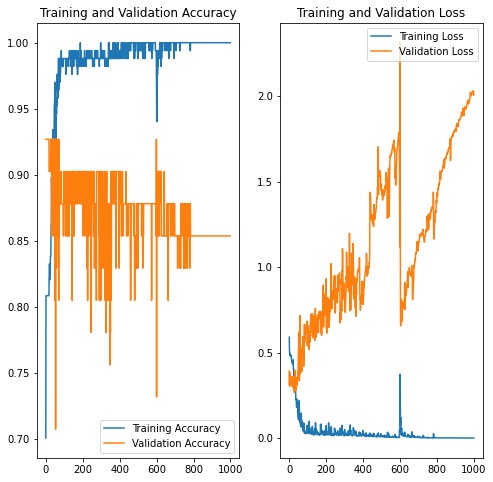

In [72]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
#Data augmentation
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

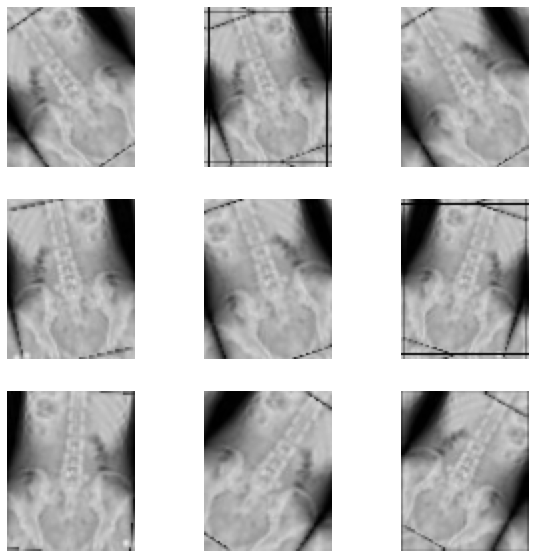

In [25]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [26]:
#dropout
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
6/6 [==============================] - 1s 120ms/step - loss: 0.5386 - accuracy: 0.8084 - val_loss: 0.4579 - val_accuracy: 0.9268
Epoch 2/15
6/6 [==============================] - 1s 94ms/step - loss: 0.5116 - accuracy: 0.8084 - val_loss: 0.2939 - val_accuracy: 0.9268
Epoch 3/15
6/6 [==============================] - 1s 95ms/step - loss: 0.5296 - accuracy: 0.8084 - val_loss: 0.3453 - val_accuracy: 0.9268
Epoch 4/15
6/6 [==============================] - 1s 95ms/step - loss: 0.5031 - accuracy: 0.8084 - val_loss: 0.4816 - val_accuracy: 0.9268
Epoch 5/15
6/6 [==============================] - 1s 96ms/step - loss: 0.5291 - accuracy: 0.8084 - val_loss: 0.3678 - val_accuracy: 0.9268
Epoch 6/15
6/6 [==============================] - 1s 97ms/step - loss: 0.4760 - accuracy: 0.8084 - val_loss: 0.2947 - val_accuracy: 0.9268
Epoch 7/15
6/6 [==============================] - 1s 97ms/step - loss: 0.5010 - accuracy: 0.8084 - val_loss: 0.3081 - val_accuracy: 0.9268
Epoch 8/15
6/6 [==========

In [74]:
folder_path="../keras/test/healthy"
images = []
for img in os.listdir(folder_path):
    img = os.path.join(folder_path, img)
    img = keras.preprocessing.image.load_img(img, target_size=(img_width, img_height))
    img = keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)
images = np.vstack(images)
predictions_healthy = model.predict(images)

folder_path_patient="../keras/test/patient"
images_2 = []
for img in os.listdir(folder_path_patient):
    img = os.path.join(folder_path_patient, img)
    img = keras.preprocessing.image.load_img(img, target_size=(img_width, img_height))
    img = keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images_2.append(img)
images_2 = np.vstack(images_2)
predictions_patient = model.predict(images_2)

top=0.0
ort=0.0
for i in range(len(predictions_healthy)):
    score = tf.nn.softmax(predictions_healthy[i])
    max=100 * np.max(score)
    print("The image {} most likely belongs to {} with a {:.2f} percent confidence."
    .format(i,class_names[np.argmax(score)],max )
    )
    top=top+max
ort=top/(len(predictions_healthy))
print("Average confidence for healthy:",ort)

#----------------------------------------

top2=0.0
ort2=0.0
for i in range(len(predictions_patient)):
    score = tf.nn.softmax(predictions_patient[i])
    max=100 * np.max(score)
    print("The image {} most likely belongs to {} with a {:.2f} percent confidence."
    .format(i,class_names[np.argmax(score)],max )
    )
    top2=top2+max
ort2=top/(len(predictions_patient))
print("Average confidence for patient:",ort2)




The image 0 most likely belongs to healthy with a 94.02 percent confidence.
The image 1 most likely belongs to patient with a 99.20 percent confidence.
The image 2 most likely belongs to patient with a 100.00 percent confidence.
The image 3 most likely belongs to patient with a 99.99 percent confidence.
The image 4 most likely belongs to patient with a 56.74 percent confidence.
The image 5 most likely belongs to patient with a 100.00 percent confidence.
Average confidence for healthy: 91.65870149930318
The image 0 most likely belongs to healthy with a 74.19 percent confidence.
The image 1 most likely belongs to patient with a 100.00 percent confidence.
The image 2 most likely belongs to patient with a 100.00 percent confidence.
The image 3 most likely belongs to healthy with a 90.81 percent confidence.
The image 4 most likely belongs to patient with a 99.51 percent confidence.
The image 5 most likely belongs to healthy with a 99.99 percent confidence.
The image 6 most likely belongs to